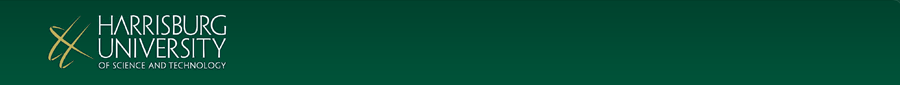
<br>
# <center> CISC 680 SU 2019
# <center> Applied Artificial Intelligence Summer Camp
## <center> Lab Booklet #08
## <center> Lab Title: Constraint Satisfaction & Search Techniques II: Dijkstra’s Algorithm & A*
***
### <center> Instructors:  Prof. Shalaan PhD, Prof. Grey M.S., Prof. Chu M.S.
### <center> TA's:  Aditya Syal, Bao Pham, Zach Pelkey
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>    

# Objectives
#### Searching problems are central to gaining an understanding of Artificial Intelligence. We will be continuing our work from the last class by implementing two classic algorithms central to the concept of modern AI: Dijkstra’s algorithm and the heuristic-based extension, A*. We will construct an algorithm so that, if fed information in the proper format, our algorithm can find the shortest path between two specified points and, potentially, display the state of the search along the way.

#### After completing this lab, you will be able to:

- __Create and implement a novel design for representing a graph__
- __Understand the differences in theory and application between Dijksta’s search algorithm and A*__
- __Understand the principle of an admissible optimistic heuristic__
- __Design and parameterize robust and necessary output__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [https://en.wikipedia.org/wiki/A*_search_algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 680 SU 2019 - Lab 08.ipynb

# Instructions & Questions
Dijkstra and A* both work on directed and undirected connected graphs where edge weights are non-negative. Given this we are going to need to construct a graph of this type and store it within our code. We can then pass this graph to the function which runs the search. The call to the function is to take the form:

`searchXxxxx(Graph g, Node start, Node end, bit robust_output)`

Where `Xxxxx` is the name of the algorithm, `Graph g` is the graph being searched, `Node start` is the starting point, `Node end` is the ending point, and `bit robust_output` represents whether the program will display more output while it is running.
When storing your graph, you will need to store each node within the graph and the connections between the nodes. For this lab, we are going to assume that edge weights are determined by Euclidean distance. Therefore, you will also need to store the coordinate of each node.

For your implementation, you will run a search using Dijkstra and A* on the graph given to determine the shortest path for `Node start` to `Node end`. The program will output the shortest path between the two nodes, the length of the path, and the number of nodes visited for each algorithm.

# <u>Part 1: Design</u>

First, you need to determine certain design aspects regarding your solution.

#### 1. Explain, in detail, how you will store your graph and nodes within your code. Be sure to explain how the data will be structured internally.

The data is stored in the form of a dictionary inside a dictionary. The nodes(key) are stored from a to e. And Adjacent Nodes are given as values.


#### 2. Explain, in detail, what additional information you will display when the <i>robust_output</i> flag is set to true. Information may be displayed before the search algorithm starts, during each iteration of searching, or after the search algorithm completes. Be sure to include when your additional data will be displayed.


#### 3. What is the optimistic heuristic that you are choosing for your implementation of A*?

h(x) is an underestimate, i.e. less than or less than equal to the exact cost of a lowcost path from the node to a end point. I locally choses the best path. the best neighbour is selected and distance is removed from the mode to the end point. 
Lets say a-b-c-d-t. We are calculating from a to b. Now the heuristic fuction is the cost(b->t).

# <u>Part 2: Concept</u>


#### 4. Translate the following maze into your graph storage methodology. You may document this using conceptual representations or code-based representations. Be sure to include “dead end” nodes in your graph.

![Maze](maze.png)

# <u>Part 3: Implementation</u>

#### 5.	Implement your solution for the `searchDijsktra` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [2]:
#reference-https://www.growingwiththeweb.com/2012/06/a-pathfinding-algorithm.html
#reference-http://code.activestate.com/recipes/578919-python-a-pathfinding-with-binary-heap/
#reference-https://stackoverflow.com/questions/14362319/python-a-implementation
#reference-http://code.activestate.com/recipes/577892-dijkstra-shortest-path-implementation/
#refrence-http://www.gilles-bertrand.com/2014/03/dijkstra-algorithm-python-example-source-code-shortest-path.html
G = {'a': {'b': 1, 'c': 2},
            'b': {'c': 3, 'd': 1, 'e':5, 'a':1},
            'c': {'d': 1, 'a': 2, 'd': 2, 'e':4},
            'd': {'e': 2, 'b':1, 'c':1,},
            'e': {'b': 5, 'd': 2, 'c':4}}
def searchDijkstra(G,src,dest,visited=[],dist={},predecessors={}):

    if src == dest:
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred)
        print('Path: ',str(path),"Cost=",str(dist[dest])) 
    else :     
        if not visited: 
            dist[src]=0
        for neighbor in G[src] :
            if neighbor not in visited:
                new_dist = dist[src] + G[src][neighbor]
                if new_dist < dist.get(neighbor,float('inf')):
                    dist[neighbor] = new_dist
                    predecessors[neighbor] = src
        visited.append(src)
        unvisited={}
        for i in G:
            if i not in visited:
                unvisited[i] = dist.get(i,float('inf'))        
        y=min(unvisited, key=unvisited.get)
        searchDijkstra(G,y,dest,visited,dist,predecessors)

print(searchDijkstra(G,'a','e'))

Path:  ['e', 'd', 'b', 'a'] Cost= 4
None



#### 6. Implement your solution for the `searchAStar` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

#Graph will be in coordinates x and y.
Remove the distance from start node to adjacent nodes.
Remove the distance from adjacent nodes to the end node.
Add it to the cost of  b to t. 
The rest is the same as Djikstra.
def heuristic():
    heu=(b[0]-a[0])**2+(b[1]-a[1])**2
    return heu




#### 7. 7.	How does the performance of your `searchDijsktra` function compare with the performance of the `searchAStar` function? Explain, in detail, with whatever relevant data you have from your code.

Dijkstra is optimised form of A*. A* never overestimates the cost. A* is faster than Djikstra, A* gives the best solution.
A* is greedy algorithm, it is breadth first search.
A*= h(x)+g(x).
Djikstra=g(x)
h(x) is heuristic 
A* is better than Djikstra, although it requires more memory but it explored less no of nodes.
A* kind of sees the future. So it wont need to backtrack.